In [34]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.getcwd())


/home/jovyan/final-group09/analysis


In [44]:
drug_od_deaths = pd.read_csv("../data/cleaned_drug_overdose_data.csv")
drug_od_deaths.head(5)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,sex,age_group,race_ethnicity
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN,All,NaN,All
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN,All,NaN,All
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN,All,NaN,All
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN,All,NaN,All
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN,All,NaN,All


In [51]:
# filter for all drug overdose deaths
all_od_deaths = drug_od_deaths[drug_od_deaths["PANEL"] == "All drug overdose deaths"]
all_od_deaths.head(5)

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,sex,age_group,race_ethnicity
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN,All,NaN,All
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN,All,NaN,All
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN,All,NaN,All
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN,All,NaN,All
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN,All,NaN,All


In [47]:
# get female and make deaths by year
female_ave = all_od_deaths[all_od_deaths["sex"] == "Female"].groupby("YEAR").sum("ESTIMATE").reset_index()
female_ave["sex"] = "Female"

male_ave = all_od_deaths[all_od_deaths["sex"] == "Male"].groupby("YEAR").sum("ESTIMATE").reset_index()
male_ave["sex"] = "Male"

# make one dataframe to hold both sums
male_female_ave = pd.concat([male_ave, female_ave])
male_female_ave.head(5)

,YEAR,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR_NUM,AGE_NUM,ESTIMATE,FLAG,age_group,sex
0,1999,0,10,43,45.6,10,11.0,71.2,0.0,0.0,Male
1,2000,0,10,43,45.6,20,11.0,69.6,0.0,0.0,Male
2,2001,0,10,43,45.6,30,11.0,73.2,0.0,0.0,Male
3,2002,0,10,43,45.6,40,11.0,86.4,0.0,0.0,Male
4,2003,0,10,43,45.6,50,11.0,92.8,0.0,0.0,Male


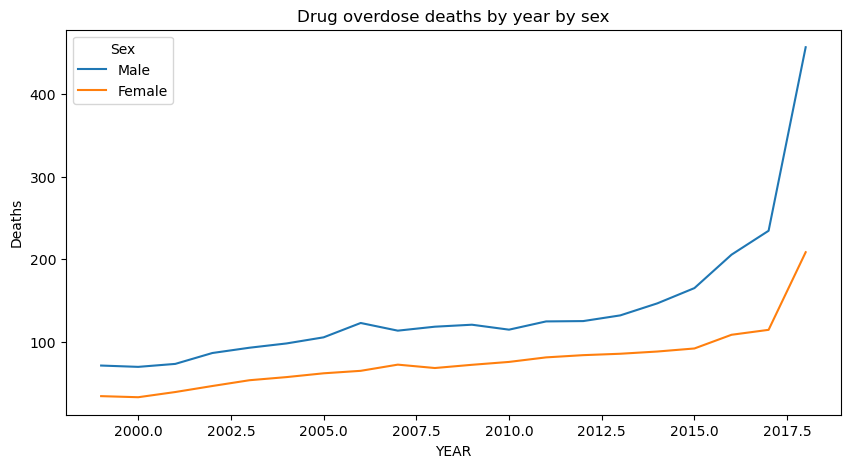

In [49]:
# plot year vs estimated deaths for each sex

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = male_female_ave, x='YEAR', y='ESTIMATE', hue='sex')

# Add a legend and show the plot
ax.set_ylabel('Deaths')
ax.legend(title= 'Sex')
ax.set_title('Drug overdose deaths by year by sex')
plt.show()

In [ ]:
# filter data by age-group 
# TODO: Waiting for cleaned dataset to include age-groups


In [63]:
# heatmap of rates by age x year
# TODO: Create this after age-groups are provided in the data file
# For now, create a dummy heatmap using the data available
heatmap_df = drug_od_deaths[['YEAR', 'ESTIMATE', 'PANEL_NUM']]
heatmap_grouped = heatmap_df.groupby(['YEAR', 'PANEL_NUM']).sum("ESTIMATE").reset_index() 
heatmap_grouped

,YEAR,PANEL_NUM,ESTIMATE
0,1999,0,111.4
1,1999,1,52.4
2,1999,2,12.3
3,1999,3,3.3
4,1999,4,2.2
...,...,...,...
115,2018,1,428.5
116,2018,2,105.0
117,2018,3,19.8
118,2018,4,285.2


<Axes: xlabel='PANEL_NUM', ylabel='YEAR'>

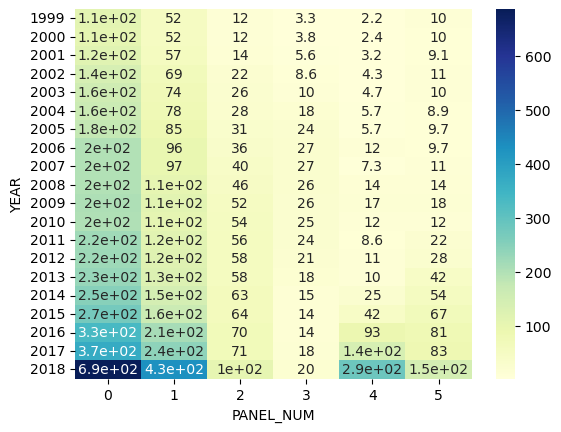

In [66]:
# Pivot the data into a matrix format (months as rows, years as columns)
heatmap_matrix = heatmap_grouped.pivot_table(index="YEAR", columns="PANEL_NUM", values="ESTIMATE")

sns.heatmap(heatmap_matrix, annot=True, cmap="YlGnBu")